In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X , y = datasets.make_circles(n_samples = 500, random_state = 123, noise = 0.1, factor=0.2)

In [3]:
print(X)
print(y)

[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

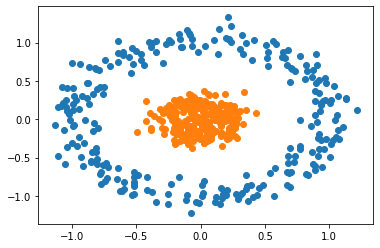

In [21]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [29]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid' )) #hidden
model.add(Dense(1, activation='sigmoid' ))
model.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
h = model.fit(x=X,y=y, verbose=1, batch_size= 20, epochs=50, shuffle='true')

Epoch 1/50
500/500 [==============================] - 0s 62us/sample - loss: 0.4956 - acc: 0.8820
Epoch 2/50
500/500 [==============================] - 0s 104us/sample - loss: 0.4716 - acc: 0.8840
Epoch 3/50
500/500 [==============================] - 0s 66us/sample - loss: 0.4480 - acc: 0.8960
Epoch 4/50
500/500 [==============================] - 0s 61us/sample - loss: 0.4249 - acc: 0.9000
Epoch 5/50
500/500 [==============================] - 0s 60us/sample - loss: 0.4027 - acc: 0.9060
Epoch 6/50
500/500 [==============================] - 0s 62us/sample - loss: 0.3810 - acc: 0.9100
Epoch 7/50
500/500 [==============================] - 0s 66us/sample - loss: 0.3604 - acc: 0.9200
Epoch 8/50
500/500 [==============================] - 0s 54us/sample - loss: 0.3409 - acc: 0.9320
Epoch 9/50
500/500 [==============================] - 0s 66us/sample - loss: 0.3229 - acc: 0.9420
Epoch 10/50
500/500 [==============================] - 0s 72us/sample - loss: 0.3058 - acc: 0.9440
Epoch 11/50
500/50

Text(0.5, 1.0, 'accuracy')

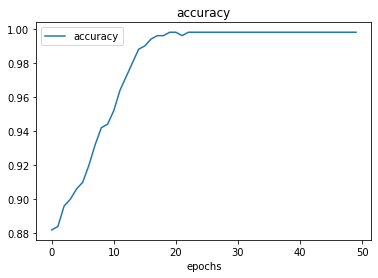

In [32]:
plt.plot(h.history['acc'])
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

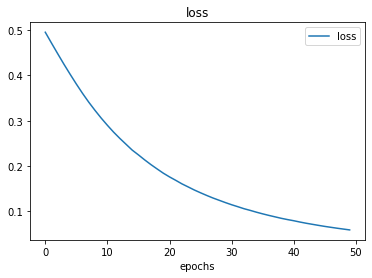

In [33]:
plt.plot(h.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])
plt.title('loss')

In [47]:
def plot_decision_bountary(X,y,model):
    x_span = np.linspace(min(X[:,0]-.25), max(X[:,0]+.25))
    y_span = np.linspace(min(X[:,1]-.25), max(X[:,1]+.25))
    xx, yy = np.meshgrid(x_span, y_span)
    xx_ , yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)
    

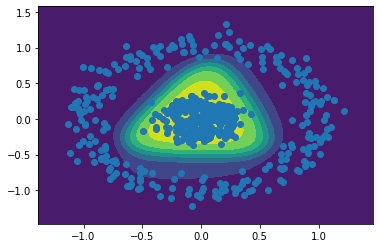

In [50]:
plot_decision_bountary(X,y,model)
plt.scatter(X[:500,0], X[:500,1])
plt.scatter(X[500:,0], X[500:,1])

[[0.32420203]]


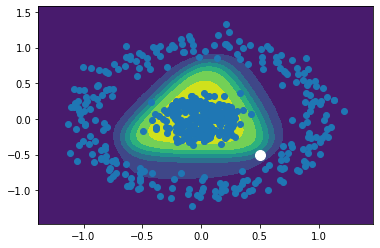

In [58]:
plot_decision_bountary(X,y,model)
plt.scatter(X[:500,0], X[:500,1])
plt.scatter(X[500:,0], X[500:,1])
prediction = model.predict(np.array([[0.5,-0.5]]))
plt.plot([0.5],[-.5], marker='o', markersize=10, color='white')
print(prediction)

In [44]:
X[500:,1].shape

(0,)

[[0.9658275]]


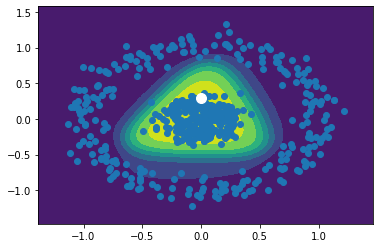

In [59]:
plot_decision_bountary(X,y,model)
plt.scatter(X[:500,0], X[:500,1])
plt.scatter(X[500:,0], X[500:,1])
prediction = model.predict(np.array([[0,.3]]))
plt.plot([0],[.3], marker='o', markersize=10, color='white')
print(prediction)